## A simple example of how to implement a DiD analysis in Python

Suppose we want to estimate the effect of a new policy on the sales of two different stores (Store A and Store B). The policy was implemented in Store A but not in Store B. We have sales data for both stores before and after the policy implementation.



In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [48]:
# Create a hypothetical dataset
years = np.arange(2010, 2021)

# Generate sales data for Store A
store_A_sales_1 = np.random.randint(70, 80, size=5)  # First 5 years range between 70 and 80
store_A_sales_2 = np.random.randint(100, 110, size=6)  # Next 6 years range between 100 and 120
store_B_sales = np.random.randint(70, 80, size=11)  # Store B's sales range between 70 and 80 for all years

data = {
    'store': ['A']*11 + ['B']*11,
    'year': np.concatenate([years]*2),
    'sales': np.concatenate([store_A_sales_1, store_A_sales_2, store_B_sales])
}
df = pd.DataFrame(data)


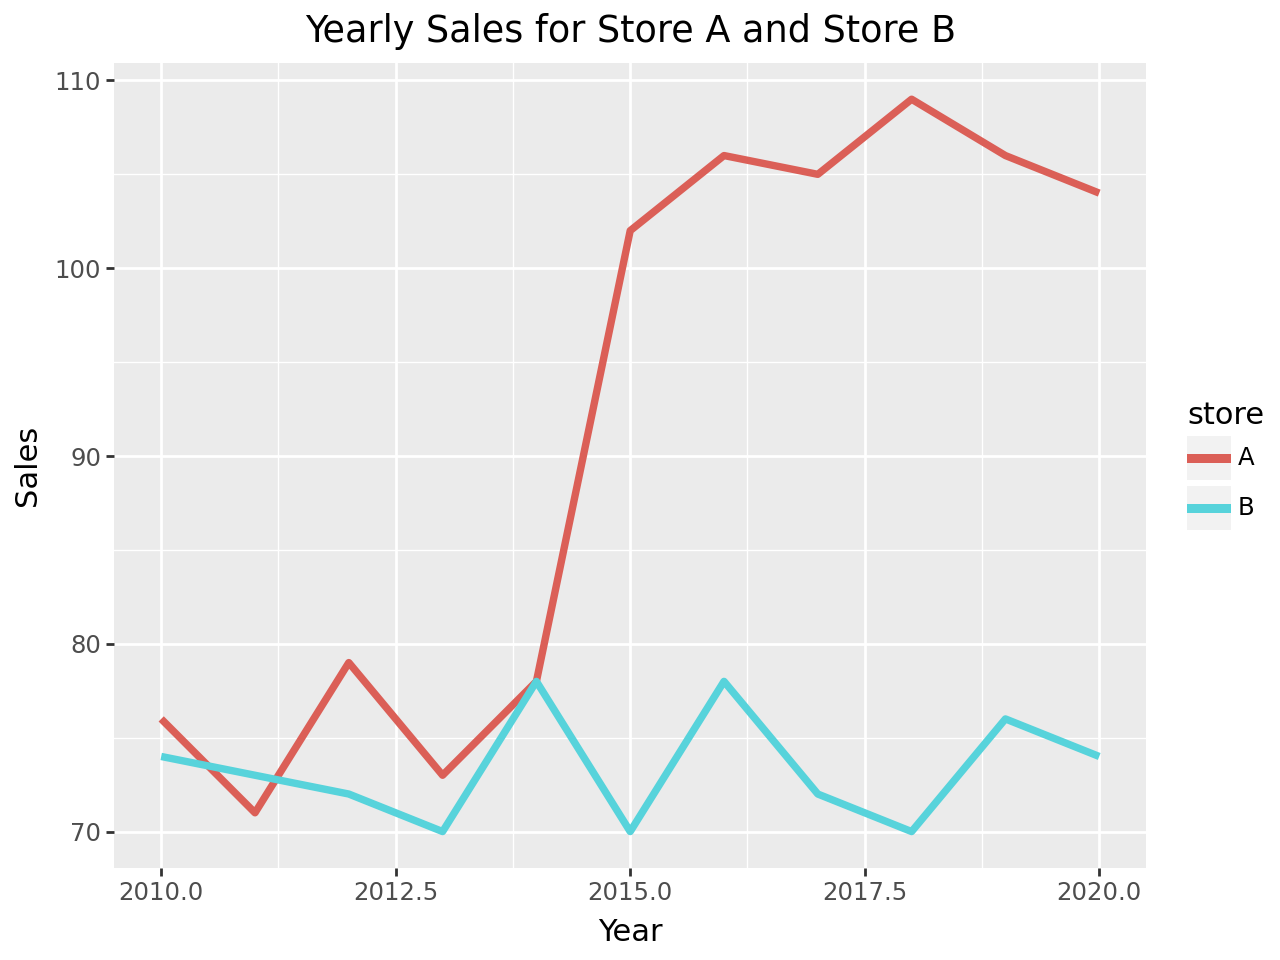

In [49]:
import plotnine as p9


# Convert the DataFrame to a long format for plotting
# df_long = df.melt(id_vars=['store', 'year'], value_vars=['sales'], var_name='variable', value_name='sales')

# Create the plot
(p9.ggplot(df, p9.aes(x='year', y='sales', color='store')) +
 p9.geom_line(size=1.5) +
 p9.labs(x='Year', y='Sales', title='Yearly Sales for Store A and Store B'))


In [46]:
# Create a treatment indicator variable
df['treatment'] = (df['store'] == 'A').astype(int)

# Create a post-treatment indicator variable
df['post'] = (df['year'] >= 2015).astype(int)

# Create the interaction term
df['treatment_post'] = df['treatment'] * df['post']


In [47]:
# Perform Difference-in-Differences analysis using OLS regression
X = df[['treatment', 'post', 'treatment_post']]
X = sm.add_constant(X)  # Add constant term for intercept
y = df['sales']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     114.3
Date:                Fri, 10 May 2024   Prob (F-statistic):           6.57e-12
Time:                        13:58:23   Log-Likelihood:                -59.923
No. Observations:                  22   AIC:                             127.8
Df Residuals:                      18   BIC:                             132.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             75.4000      1.823     41.

In this example:

- We create a DataFrame `df` with columns for the store, year, and sales.
- We create indicator variables for treatment (store A) and post-treatment period (year 2020).
- We include an interaction term between treatment and post-treatment period to capture the treatment effect.
- We perform an Ordinary Least Squares (OLS) regression using the `statsmodels` library to estimate the treatment effect.

The regression coefficient associated with the `treatment:post` interaction term represents the estimated difference-in-differences effect. If this coefficient is statistically significant, it indicates that the policy had a significant impact on sales.